In [1]:
import sys
import os
sys.path.append('../')
import ghiaseddin

import numpy as np
import lasagne

%matplotlib inline

import matplotlib
import matplotlib.pylab as plt
from datetime import datetime as dt

Using gpu device 0: GeForce GTX TITAN Black (CNMeM is disabled, CuDNN 4007)


In [2]:
lfw = ghiaseddin.LFW10(ghiaseddin.settings.lfw10_root, attribute_index=4)
googlenet = ghiaseddin.GoogLeNet(ghiaseddin.settings.googlenet_weights)

A is the same as B in masculinelooking (t: 0.50)


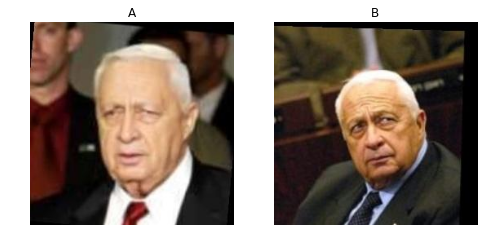

A is less masculinelooking than B (t: 0.00)


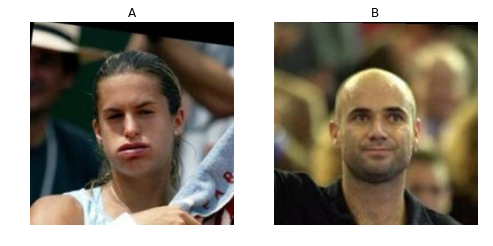

A is the same as B in masculinelooking (t: 0.50)


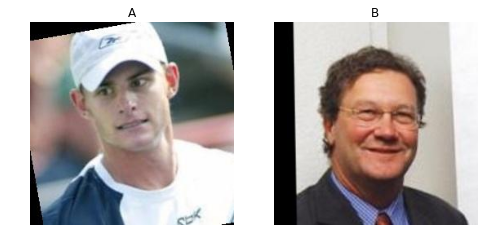

A is the same as B in masculinelooking (t: 0.50)


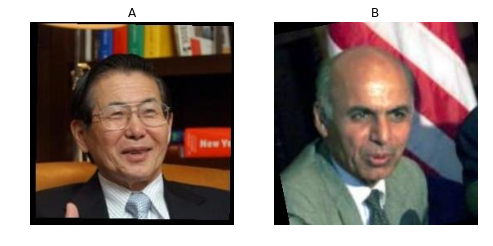

A is less masculinelooking than B (t: 0.00)


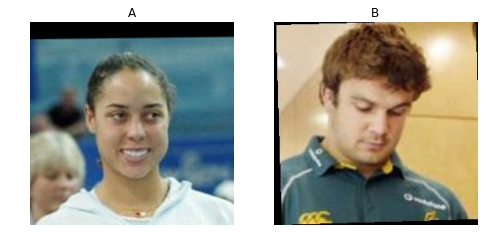

A is more masculinelooking than B (t: 1.00)


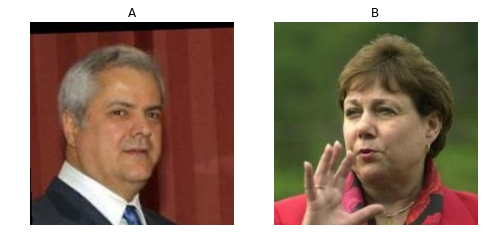

A is the same as B in masculinelooking (t: 0.50)


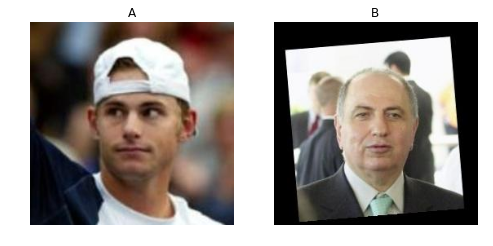

A is the same as B in masculinelooking (t: 0.50)


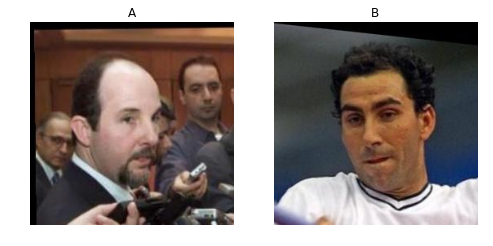

A is the same as B in masculinelooking (t: 0.50)


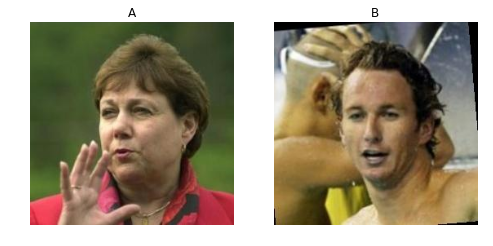

A is the same as B in masculinelooking (t: 0.50)


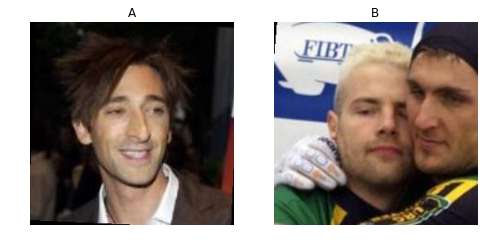

In [3]:
L = 0
for i in range(L, L + 10):
    lfw.show_pair(i)

A is the same as B in masculinelooking (t: 0.50)


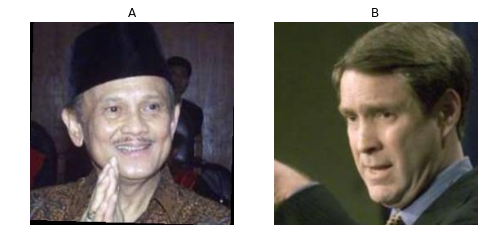

A is less masculinelooking than B (t: 0.00)


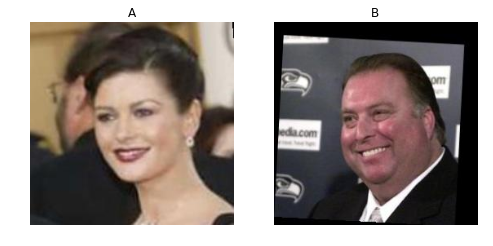

A is the same as B in masculinelooking (t: 0.50)


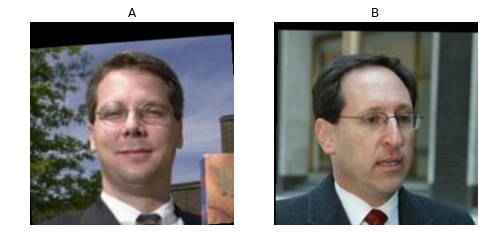

A is more masculinelooking than B (t: 1.00)


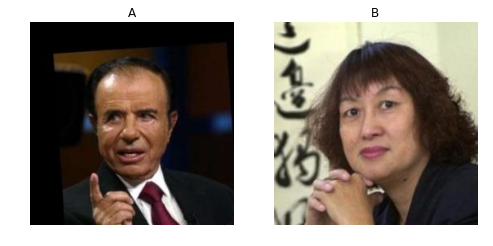

A is more masculinelooking than B (t: 1.00)


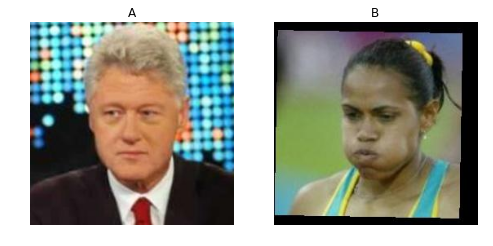

A is less masculinelooking than B (t: 0.00)


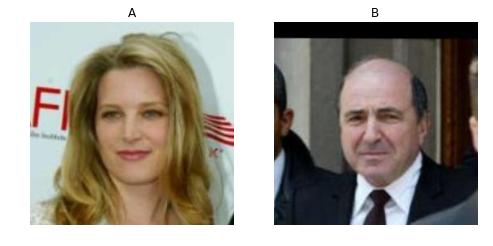

A is the same as B in masculinelooking (t: 0.50)


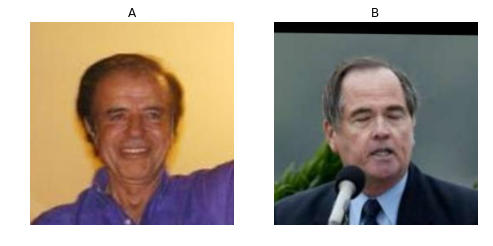

A is the same as B in masculinelooking (t: 0.50)


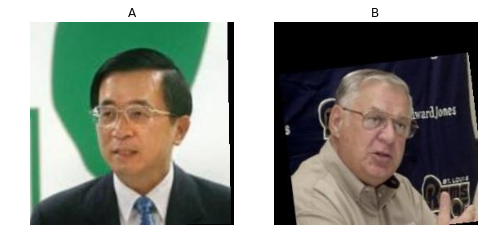

A is the same as B in masculinelooking (t: 0.50)


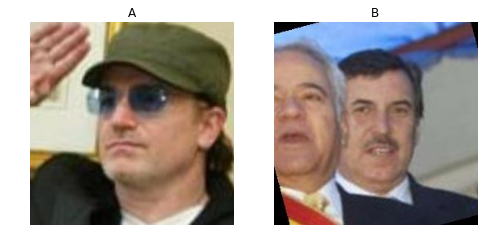

A is the same as B in masculinelooking (t: 0.50)


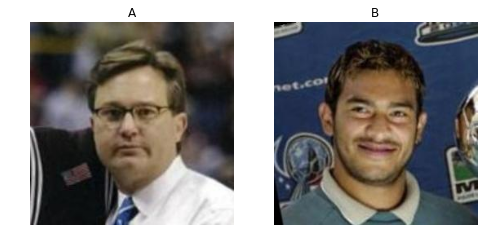

In [4]:
L = 200
for i in range(L, L + 10):
    lfw.show_pair(i, test=True)

In [3]:
model = ghiaseddin.Ghiaseddin(extractor=googlenet,
                              dataset=lfw,
                              weight_decay=1e-5,
                              optimizer=lasagne.updates.rmsprop,
                              ranker_learning_rate=1e-4,
                              extractor_learning_rate=1e-5,
                              ranker_nonlinearity=lasagne.nonlinearities.linear,
                              train_batch_size=16)

In [4]:
matrixes = []

In [5]:
matrixes.append(model.estimates_predictions_corrects_on_test())

In [6]:
model.eval_accuracy()

0.5919540229885057

In [7]:
for i in range(5):
    model.train_one_epoch()
    sys.stdout.write('epoch %d, accuracy: %2.2f\n' % (i+1, model.eval_accuracy() * 100))
    sys.stdout.flush()
    matrixes.append(model.estimates_predictions_corrects_on_test())

epoch 1, accuracy: 76.44
epoch 2, accuracy: 83.91
epoch 3, accuracy: 85.06
epoch 4, accuracy: 87.36
epoch 5, accuracy: 87.93


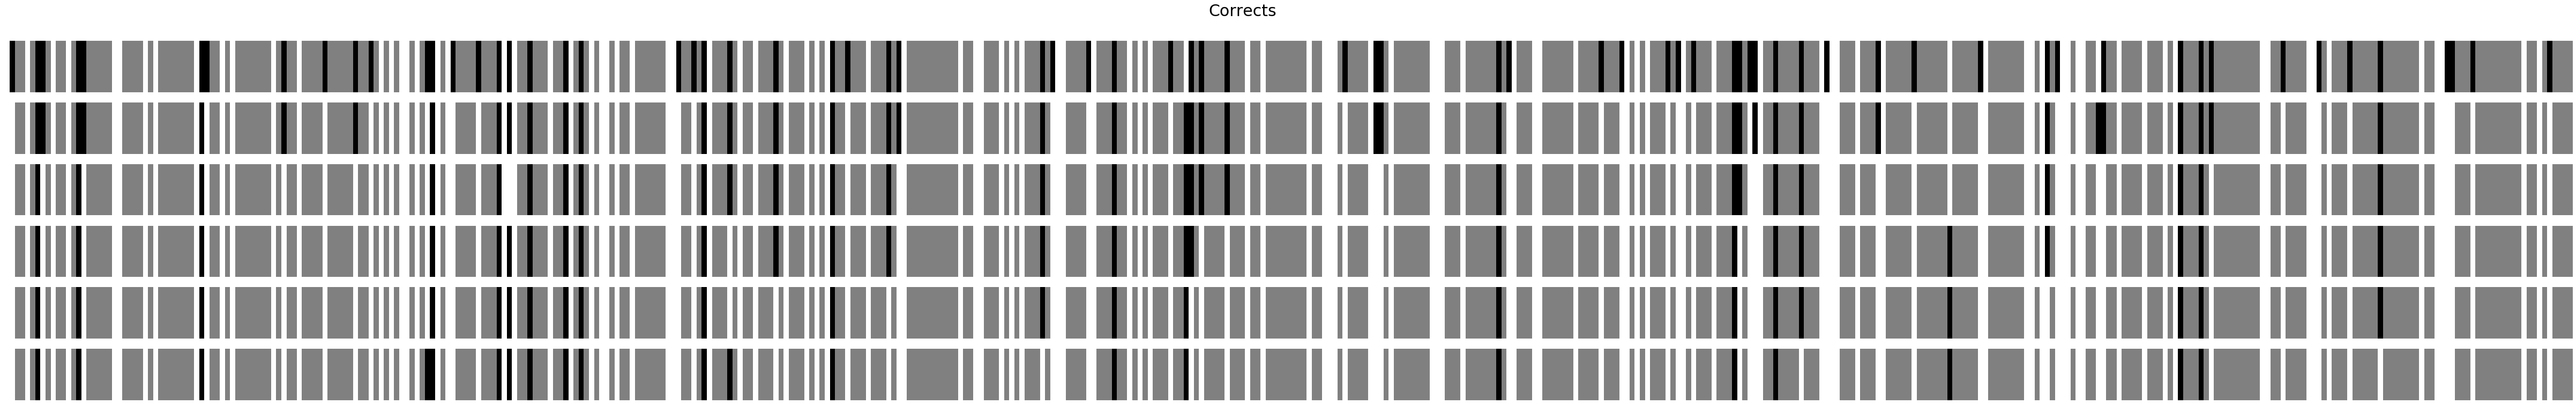

In [8]:
fig = ghiaseddin.utils.show_training_matrixes([ghiaseddin.utils.convert_estimates_on_test_to_matrix(c) for e, p, c in matrixes], 'Corrects')

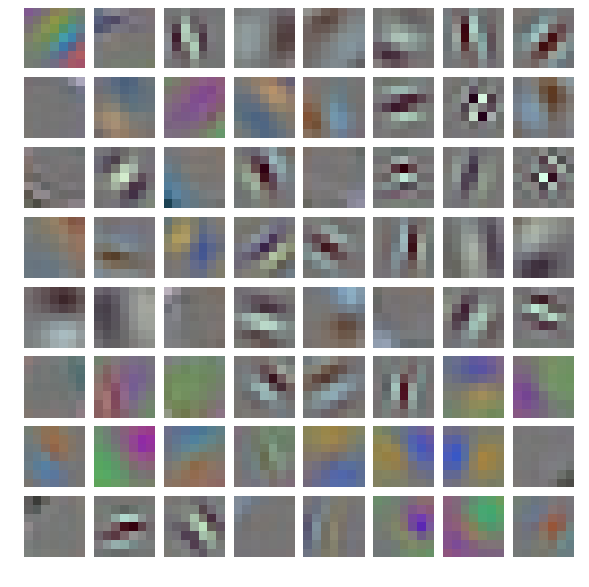

In [9]:
model.conv1_filters()

In [18]:
model.save()

In [19]:
model.generate_misclassified()